In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TugasPraktikumML"

In [ ]:
%cd /content/drive/MyDrive/TugasPraktikumML
!ls -a

/content/drive/MyDrive/TugasPraktikumML
kaggle.json


In [ ]:
!kaggle datasets download denizkavi1/brain-tumor

 98% 688M/700M [00:28<00:00, 19.3MB/s]
100% 700M/700M [00:28<00:00, 25.3MB/s]


In [ ]:
#Ekstrak dataset
import os
import zipfile

local_zip = "/content/drive/MyDrive/TugasPraktikumML/brain-tumor.zip"
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/TugasPraktikumML/brain-tumor.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/TugasPraktikumML")

In [ ]:
import os
base_dataset = '/content/drive/MyDrive/TugasPraktikumML/dataset'
class_dir = ['Meningioma', 'Glioma', 'Pituitary' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir,item))

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/TugasPraktikumML/dataset',
                   output="/content/drive/MyDrive/TugasPraktikumML/dataset2",
                   seed=42, ratio=(.8 ,0.19 ,0.01), group_prefix=None)

Copying files: 3064 files [00:57, 53.13 files/s]


In [ ]:
import os
base_dir = '/content/drive/MyDrive/TugasPraktikumML/dataset2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_meningioma_dir = os.path.join(train_dir, 'Meningioma')
train_glioma_dir = os.path.join(train_dir, 'Glioma')
train_pituitary_dir = os.path.join(train_dir, 'Pituitary')

validation_meningioma_dir = os.path.join(validation_dir, 'Meningioma')
validation_glioma_dir = os.path.join(validation_dir, 'Glioma')
validation_pituitary_dir = os.path.join(validation_dir, 'Pituitary')

test_meningioma_dir = os.path.join(test_dir, 'Meningioma')
test_glioma_dir = os.path.join(test_dir, 'Glioma')
test_pituitary_dir = os.path.join(test_dir, 'Pituitary')

In [ ]:
print('Data Train : ')
print('Train Meningioma :', len(os.listdir(train_meningioma_dir)))
print('Train Glioma : ', len(os.listdir(train_glioma_dir)))
print('Train Pituitary : ', len(os.listdir(train_pituitary_dir)))
print(""*2)
print('Data Validation : ')
print('Validation Meningioma :', len(os.listdir(validation_meningioma_dir)))
print('Validationn Glioma : ', len(os.listdir(validation_glioma_dir)))
print('Validation Pituitary : ', len(os.listdir(validation_pituitary_dir)))
print(""*2)
print('Data Test : ')
print('Test Meningioma :', len(os.listdir(test_meningioma_dir)))
print('Test Glioma : ', len(os.listdir(test_glioma_dir)))
print('Test Pituitary : ', len(os.listdir(test_pituitary_dir)))

Data Train : 
Train Meningioma : 566
Train Glioma :  1140
Train Pituitary :  744

Data Validation : 
Validation Meningioma : 134
Validationn Glioma :  270
Validation Pituitary :  176

Data Test : 
Test Meningioma : 8
Test Glioma :  16
Test Pituitary :  10


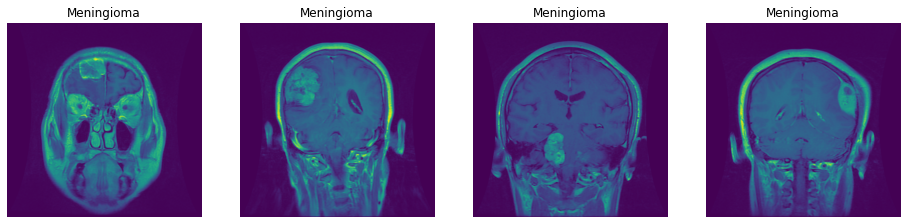

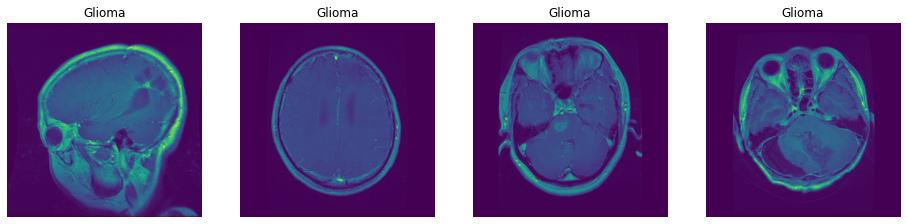

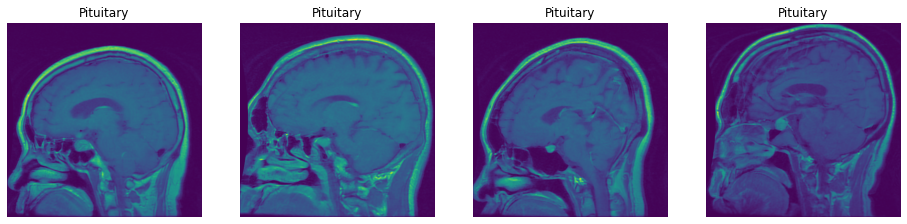

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

meningioma_image = os.listdir(train_meningioma_dir)
glioma_image = os.listdir(train_glioma_dir)
pituitary_image = os.listdir(train_pituitary_dir)

fname1 = [os.path.join(train_meningioma_dir,fname)
        for fname in meningioma_image[:4]]

fname2 = [os.path.join(train_glioma_dir,fname)
        for fname in glioma_image[:4]]

fname3 = [os.path.join(train_pituitary_dir,fname)
        for fname in pituitary_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Meningioma')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Glioma')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pituitary')
    plt.imshow(img)
    
plt.show()

In [ ]:
!pip3 install keras

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
height = 100
width = 100
batch_size = 32

In [ ]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = "/content/drive/MyDrive/TugasPraktikumML/dataset2/train"
VALIDATION_DIR = "/content/drive/MyDrive/TugasPraktikumML/dataset2/val"
TEST_DIR = "/content/drive/MyDrive/TugasPraktikumML/dataset2/test"

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 2450 images belonging to 3 classes.
Found 580 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [27]:
#coba Model 1
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 batch_normalization_10 (Bat  (None, 100, 100, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 batch_normalization_11 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                      

In [28]:
#Compile Model 1
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='acc')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
H = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = validation_generator)

Epoch 1/100
10/10 [==============================] - 20s 2s/step - loss: 11.4083 - acc: 0.4906 - val_loss: 1.0794 - val_acc: 0.4724
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 3.1627 - acc: 0.2750 - val_loss: 1.1006 - val_acc: 0.3052
Epoch 3/100
10/10 [==============================] - 19s 2s/step - loss: 0.9098 - acc: 0.6969 - val_loss: 1.0995 - val_acc: 0.3086
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 1.0797 - acc: 0.5031 - val_loss: 1.0851 - val_acc: 0.5397
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 1.1809 - acc: 0.3500 - val_loss: 1.0955 - val_acc: 0.3034
Epoch 6/100
10/10 [==============================] - 19s 2s/step - loss: 1.0598 - acc: 0.5719 - val_loss: 1.0705 - val_acc: 0.5000
Epoch 7/100
10/10 [==============================] - 19s 2s/step - loss: 0.9870 - acc: 0.6625 - val_loss: 1.1569 - val_acc: 0.3034
Epoch 8/100
10/10 [==============================] - 19s 2s/step - loss: 1.3345 - 

In [30]:
model.save('/content/drive/MyDrive/TugasPraktikumML/model/model3_1.h5')

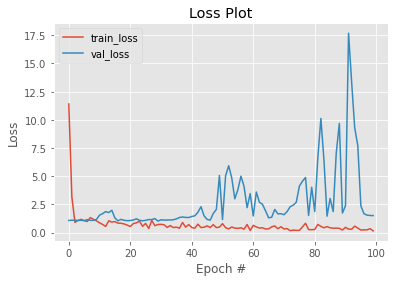

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

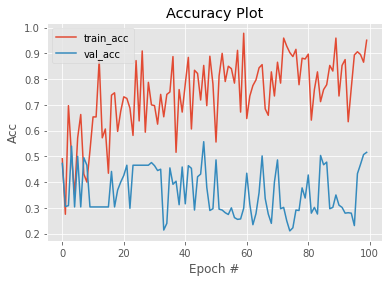

In [32]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import classification_report

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=['meningioma', 'glioma', 'pituitary']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
              precision    recall  f1-score   support

  meningioma       0.50      0.94      0.65        16
      glioma       0.50      0.12      0.20         8
   pituitary       1.00      0.20      0.33        10

    accuracy                           0.53        34
   macro avg       0.67      0.42      0.40        34
weighted avg       0.65      0.53      0.45        34

